# Structured Data Processing

data**set**: 독립, 순서 상관 없음

**정형 데이터**는 모두 독립, 예외) 시계열 데이터: 시간에 dependent

**비정형 데이터** => 독립적이라 가정하고 정형화

In [8]:
import seaborn as sns

tips = sns.load_dataset('tips')
tips # dataframe, 각 row, column은 homogeneous

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Structured Array

Class를 하나 선언해서 이를 사용 가능, C/C++에서는 구조체라고 불리는 형태

Table: 각 행 또는 열끼리 homogeneous한 array의 집합, 시계열로 겹치면 3차원(Panel Data)

In [1]:
import numpy as np

x = np.array([('Rex', 9, 81.0), ('Fido', 3, 27.0)],
             dtype=[('name', 'U10'), ('age', 'i4'), ('weight', 'f4')])
x

array([('Rex', 9, 81.), ('Fido', 3, 27.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f4')])

|name|age|weight|
|:-:|:-:|:-:|
|Rex|9|81.0|
|Fido|3|27.0|

In [2]:
x['name']

array(['Rex', 'Fido'], dtype='<U10')

In [6]:
# x.name # 지원 안해서 넣은 기능 np.rec(record)

In [4]:
x = np.rec.array([('Rex', 9, 81.0), ('Fido', 3, 27.0)],
             dtype=[('name', 'U10'), ('age', 'i4'), ('weight', 'f4')])
x

rec.array([('Rex', 9, 81.), ('Fido', 3, 27.)],
          dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f4')])

In [5]:
x.name

array(['Rex', 'Fido'], dtype='<U10')

NameError: name 'tips' is not defined

In [9]:
dir(tips)
# numpy 기반으로
# '__array__',
# '__array_priority__',
# '__array_ufunc__',

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__r

In [10]:
type(tips) # numpy를 컴포지팅해서 만든 데이터셋

pandas.core.frame.DataFrame

### 1. 데이터의 전체적인 관점을 파악 `.info()`

각 column마다 데이터의 이름과 타입 등을 파악.

numpy에서 pandas로 넘어오면서 카테고리(Category, Ordinal) 데이터 타입을 표현 가능하게 됨.

In [11]:
3tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### 2. 구조를 파악 `.describe()`

모양이 wide냐 long이냐부터 시작해서...

탐색적 데이터 분석(EDA): 통계와 그래프의 도움을 받아 데이터를 조감한다.

In [24]:
# 기초 통계를 보여줌, pandas는 옵션을 list 형태로, 1개일 때는 문자열로만 해도 됨
# tips.describe()
tips.describe(include='category')
# tips.describe(include=['float64', 'category'])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [22]:
tips.head() # 가장 첫 데이터 n개(기본 5개)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
tips.tail() # 가장 마지막 데이터 n개(기본 5개)

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [21]:
tips.sample(10) # 무작위 n개

,total_bill,tip,sex,smoker,day,time,size
97,12.03,1.50,Male,Yes,Fri,Dinner,2
71,17.07,3.00,Female,No,Sat,Dinner,3
167,31.71,4.50,Male,No,Sun,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
112,38.07,4.00,Male,No,Sun,Dinner,3
38,18.69,2.31,Male,No,Sat,Dinner,3
60,20.29,3.21,Male,Yes,Sat,Dinner,2
15,21.58,3.92,Male,No,Sun,Dinner,2
201,12.74,2.01,Female,Yes,Thur,Lunch,2
212,48.33,9.00,Male,No,Sat,Dinner,4


발견해서 고치기 위해서는 일단 고칠 대상을 찍는다! indexing/slicing

In [28]:
tips.iloc[0:3] # 파이썬의 인덱싱 방법과 같다. 0이상 3미만

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [30]:
tips.loc[0:3] # 데이터분석하는 사람들에게 조금 더 직관적. 0이상 3이하

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


In [33]:
tips[['total_bill']] # Fancy indexing, 차원 유지

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


In [34]:
tips[['tip', 'total_bill']]

,tip,total_bill
0,1.01,16.99
1,1.66,10.34
2,3.50,21.01
3,3.31,23.68
4,3.61,24.59
...,...,...
239,5.92,29.03
240,2.00,27.18
241,2.00,22.67
242,1.75,17.82


In [37]:
tips[tips.tip > 2] # Boolean indexing
# Broadcasting한 결과를 True/False로 표현 가능

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
232,11.61,3.39,Male,No,Sat,Dinner,2
234,15.53,3.00,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3


In [50]:
%timeit tips.iloc[0,3] # iloc는 이름으로 적어낼 수 없음

21.6 µs ± 3.66 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [51]:
%timeit tips.loc[0, 'smoker']

11.4 µs ± 2.59 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [52]:
%timeit tips.iat[0, 3] # 파이썬 방식을 활용하면 느리다

17.2 µs ± 2.28 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [53]:
%timeit tips.at[0, 'smoker'] # 더 빠르다

6.3 µs ± 1.62 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [54]:
tips.loc[0, 'smoker'] = 'Yes' # 잘못된 데이터 수정하기

In [56]:
tips.sex

,sex
0,Female
1,Male
2,Male
3,Male
4,Female
...,...
239,Male
240,Female
241,Male
242,Male


In [59]:
# 모든 여성들을 흡연자로 바꾼다. Broadcasting 지원
tips[tips.sex=='Female'].smoker = 'Yes'

<ipython-input-59-96ec258423e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips[tips.sex=='Female'].smoker = 'Yes'


In [60]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,Yes,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Column 이름에 공백이나 특수문자가 들어가면 '.' indexing 불가. 따라서, 이름을 바꾸고 사용하는 것을 권한다.

In [64]:
tips.filter(regex='^t')

,total_bill,tip,time
0,16.99,1.01,Dinner
1,10.34,1.66,Dinner
2,21.01,3.50,Dinner
3,23.68,3.31,Dinner
4,24.59,3.61,Dinner
...,...,...,...
239,29.03,5.92,Dinner
240,27.18,2.00,Dinner
241,22.67,2.00,Dinner
242,17.82,1.75,Dinner


In [66]:
tips.select_dtypes(['float64', 'category'])

,total_bill,tip,sex,smoker,day,time
0,16.99,1.01,Female,Yes,Sun,Dinner
1,10.34,1.66,Male,No,Sun,Dinner
2,21.01,3.50,Male,No,Sun,Dinner
3,23.68,3.31,Male,No,Sun,Dinner
4,24.59,3.61,Female,No,Sun,Dinner
...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner
240,27.18,2.00,Female,Yes,Sat,Dinner
241,22.67,2.00,Male,Yes,Sat,Dinner
242,17.82,1.75,Male,No,Sat,Dinner


In [70]:
tips.loc[0:10, lambda x: ['sex', 'smoker']] # 열 뽑기, 함수를 활용해 boolean indexing을 진행

,sex,smoker
0,Female,Yes
1,Male,No
2,Male,No
3,Male,No
4,Female,No
5,Male,No
6,Male,No
7,Male,No
8,Male,No
9,Male,No


In [74]:
tips.loc[lambda x: x.tip>3] # 행 뽑기, callable의 패턴

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
219,30.14,3.09,Female,Yes,Sat,Dinner,4
221,13.42,3.48,Female,Yes,Fri,Lunch,2
232,11.61,3.39,Male,No,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3


In [75]:
# 행과 열마다 함수로 처리해 원하는 값을 찾을 수 있다.
tips.loc[lambda x: x.tip>3, lambda x: ['sex', 'smoker']]

,sex,smoker
2,Male,No
3,Male,No
4,Female,No
5,Male,No
7,Male,No
...,...,...
219,Female,Yes
221,Female,Yes
232,Male,No
238,Female,No


## Pandas로 데이터 불러오기
https://www.data.go.kr/ 에서 공공데이터를 가져와 테스트해보자.

In [76]:
%%writefile a.text
12345
[1,2,3]
asdfasdf

Writing a.text


In [78]:
# 파이썬은 모든 것을 문자로 저장한다.
with open('a.txt') as f:
  print(f.readlines())

FileNotFoundError: [Errno 2] No such file or directory: '../a.txt'

In [81]:
# list를 저장하려면 문자열로 저장됨, 부가적인 datatype과 같은 정보를 저장할 수 없다.
a = [1,2,3]

with open('b.txt', 'w') as f:
  f.writelines(str(a))

In [ ]:
# 해결방법: pickle
import pickle

# 파일로 저장할 때 b(BYTE)로 저장, 이렇게 해야 인코딩 가능
with open('aa.p', 'wb') as f:
  pickle.dump(a,f)

In [ ]:
with open('aa.p', 'rb') as f:
  xx = pickle.load(f)

In [83]:
type(xx)

list

In [93]:
import tensorflow as tf
import inspect

In [94]:
print(inspect.getsource(tf.keras.datasets.mnist.load_data)) # mnist.npz

@keras_export("keras.datasets.mnist.load_data")
def load_data(path="mnist.npz"):
    """Loads the MNIST dataset.

    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).

    Args:
        path: path where to cache the dataset locally
            (relative to `~/.keras/datasets`).

    Returns:
        Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.

    **`y_train`**: `uint8` NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.

    **`x_test`**: `uint8` NumPy array of grayscale image data with shapes
      `(10000, 28, 28)`, containing the test data. Pixel values range
      from 0 to 255.

    **`y_tes

In [91]:
import numpy as np

In [95]:
a = np.arange(10)

In [96]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# a.save(z)... # 묶기 및 맙축, .npz format으로

In [88]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# 엑셀은 다양한 요소들이 추가적으로 있어서 완전히 데이터만을 불러올 수는 없다.
# 정보가 많이 유지되는 것을 사용하는 것이 실무에서는 유리하다(csv보다 xsl같은...)
# data를 보여주는 방식은 read_csv가 정한다.
data = pd.read_csv('/content/drive/My Drive/Colab/INISW/DP/seoul.csv')

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553535 entries, 0 to 553534
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     553535 non-null  object 
 1   상호명        553535 non-null  object 
 2   지점명        49419 non-null   object 
 3   상권업종대분류코드  553535 non-null  object 
 4   상권업종대분류명   553535 non-null  object 
 5   상권업종중분류코드  553535 non-null  object 
 6   상권업종중분류명   553535 non-null  object 
 7   상권업종소분류코드  553535 non-null  object 
 8   상권업종소분류명   553535 non-null  object 
 9   표준산업분류코드   553343 non-null  object 
 10  표준산업분류명    553343 non-null  object 
 11  시도코드       553535 non-null  int64  
 12  시도명        553535 non-null  object 
 13  시군구코드      553535 non-null  int64  
 14  시군구명       553535 non-null  object 
 15  행정동코드      553535 non-null  int64  
 16  행정동명       553535 non-null  object 
 17  법정동코드      553535 non-null  int64  
 18  법정동명       553535 non-null  object 
 19  지번코드       553535 non-n

In [98]:
data['상권업종대분류코드']

,상권업종대분류코드
0,P1
1,I2
2,L1
3,L1
4,I2
...,...
553530,S2
553531,G2
553532,M1
553533,I2


In [99]:
# 몇 개가 있는지 표로 sorting
data['상권업종대분류코드'].value_counts()

,count
상권업종대분류코드,
I2,144885
G2,118697
M1,94499
S2,53048
P1,44525
L1,25189
N1,24801
R1,20902
Q1,18743


<Axes: xlabel='상권업종대분류코드'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}

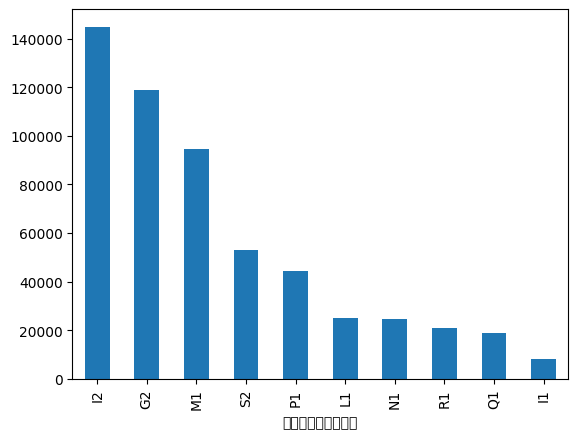

In [100]:
# index가 x축으로 놓고 .plot하면 시각적으로 비교도 가능(histogram)
data['상권업종대분류코드'].value_counts().plot.bar()

Imbalanced Dataset: 정보량이 많은 쪽을 보다 정확하게 모델이 예측할 수 있다. 따라서, 값별로 균형을 맞출 필요가 있다.

In [101]:
np.unique(data['상권업종대분류코드']) # 함수 방식, sorting이 되어 나옴

array(['G2', 'I1', 'I2', 'L1', 'M1', 'N1', 'P1', 'Q1', 'R1', 'S2'],
      dtype=object)

In [102]:
data['상권업종대분류코드'].unique()   # 메소드 방식

array(['P1', 'I2', 'L1', 'G2', 'S2', 'M1', 'N1', 'R1', 'I1', 'Q1'],
      dtype=object)

In [104]:
data['상권업종대분류코드'].nunique() # 몇 개?

10

Inconsistent Data: 동일하지만 표현 방법이 다른 data의 값이 안 맞는 경우

In [105]:
data['상권업종대분류코드'].value_counts()

,count
상권업종대분류코드,
I2,144885
G2,118697
M1,94499
S2,53048
P1,44525
L1,25189
N1,24801
R1,20902
Q1,18743


In [106]:
np.unique(data['상권업종대분류코드'], return_counts=True)

(array(['G2', 'I1', 'I2', 'L1', 'M1', 'N1', 'P1', 'Q1', 'R1', 'S2'],
       dtype=object),
 array([118697,   8246, 144885,  25189,  94499,  24801,  44525,  18743,
         20902,  53048]))

In [107]:
data['상권업종대분류명']

,상권업종대분류명
0,교육
1,음식
2,부동산
3,부동산
4,음식
...,...
553530,수리·개인
553531,소매
553532,과학·기술
553533,음식


In [108]:
data['상권업종대분류명'].value_counts()

,count
상권업종대분류명,
음식,144885
소매,118697
과학·기술,94499
수리·개인,53048
교육,44525
부동산,25189
시설관리·임대,24801
예술·스포츠,20902
보건의료,18743


In [110]:
tips = sns.load_dataset('tips')
tips # size의 이름을 바꿔야 함

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [111]:
# index, column을 바꾸라고 할지 모른다. 안 바뀐다
tips.rename({'size':'size_'})

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 지정법 1. axis

In [112]:
# column을 바꾸라고 하면 axis=1
tips.rename({'size':'size_'}, axis=1)

,total_bill,tip,sex,smoker,day,time,size_
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [114]:
# index를 바꾸라고 하면 axis=0
tips.rename({0:'zero'}, axis=0)

,total_bill,tip,sex,smoker,day,time,size
zero,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 지정법 2. rename

In [115]:
tips.rename(columns={'size':'size_'})

,total_bill,tip,sex,smoker,day,time,size_
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [116]:
tips.rename(index={0:'zero'})

,total_bill,tip,sex,smoker,day,time,size
zero,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [118]:
tips # 변경한 값이 반영되지 않음

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [120]:
tips = tips.rename(columns={'size':'size_'}) # 재할당, immutable
tips

,total_bill,tip,sex,smoker,day,time,size_
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [121]:
tips.rename(index={0:'zero'}, inplace=True) # return은 없지만 자기 자신은 바뀐다, mutable의 특징
tips

,total_bill,tip,sex,smoker,day,time,size_
zero,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## axis

차원의 축소는 axis 기반으로 이루어진다.

In [129]:
a = np.arange(24).reshape(4,6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [124]:
a.dtype

dtype('int64')

In [125]:
a.itemsize

8

In [126]:
a.strides

(48, 8)

In [127]:
a.shape

(4, 6)

In [128]:
a.sum(axis=0)

array([36, 40, 44, 48, 52, 56])

In [130]:
a.sum(axis=1)

array([ 15,  51,  87, 123])

In [138]:
a = np.arange(24).reshape(3,2,4)

In [139]:
a.shape

(3, 2, 4)

In [140]:
a.sum(axis=0).shape

(2, 4)

In [141]:
a.sum(axis=2).shape

(3, 2)

In [142]:
a.sum(axis=1).shape

(3, 4)

In [144]:
a.sum(axis=None)

np.int64(276)

In [145]:
tips

,total_bill,tip,sex,smoker,day,time,size_
zero,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [146]:
tips = sns.load_dataset('tips')

**reduction** 복잡한 것을 단순하게

In [155]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [147]:
tips.tip.sum()

np.float64(731.5799999999999)

In [148]:
tips.tip.max()

10.0

In [150]:
tips.tip.min()

1.0

In [151]:
tips.tip.mean()

np.float64(2.99827868852459)

In [152]:
tips.tip.std()

1.3836381890011826

<Axes: >

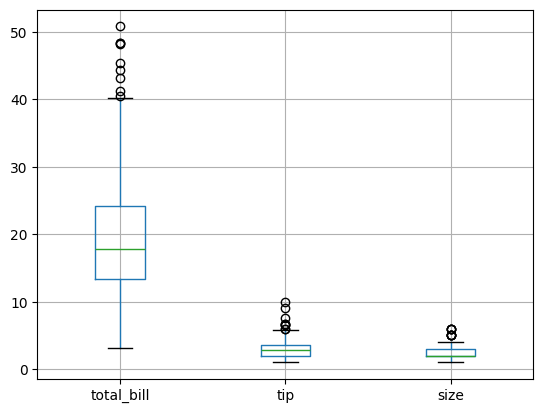

In [154]:
tips.boxplot()